# Анализ данных | Python 
## ОП «Журналистика», ОП «Медиакоммуникации» 2022/23

## Семинар 8 

## Простая линейная регрессия

Сегодня будем работать с данными по оценкам студентов и времени, которое они тратят на обучение. Загружаем необходимые библиотеки и сами данные.

Источник и описание данных: [Kaggle](https://www.kaggle.com/datasets/shrutipandit707/studytime)

In [51]:
import pandas as pd
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt

In [60]:
data = pd.read_csv('https://raw.githubusercontent.com/aaparshina/FCI_22-23_data_analysis/main/data/marks.csv')
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


В качестве зависимой переменной (отклика/ответа) у нас выступают оценки студента (вероятно, это баллы за что-то) — `Marks`. В качестве объясняющих переменных (предикторов) могут выступать `number_courses` и `time_study`.

### Предпосылки построения модели

1. Отсутствие мультиколлинеарности (корреляции между предикторами). Но так как у нас простая линейная регрессия, в которой будет одна объясняющая переменная, то на это не смотрим. 

<AxesSubplot:>

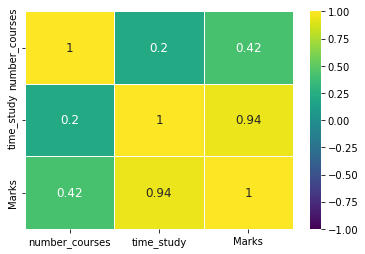

In [62]:
correlation = data[['number_courses', 'time_study', 'Marks']].corr()

sns.heatmap(correlation, vmax=1, vmin = -1, linewidths=0.5, 
            annot=True, cmap='viridis', linecolor="white", xticklabels = correlation.index,
            annot_kws = {'size':12}, yticklabels = correlation.index) 

2. Линейная взаимосвязь. Какая-то очень сильная связь есть.

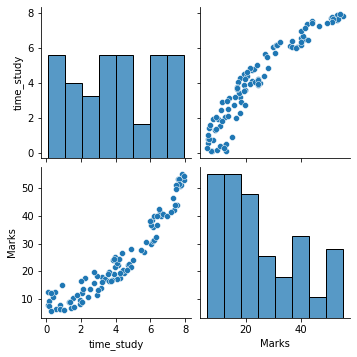

In [64]:
sns.pairplot(data[['time_study', 'Marks']])

### Модель

Попробуем построить простую регрессию, где будет одна объясняющая переменная `time_study`.

In [59]:
X = data['time_study']
y = data['Marks']

res = scipy.stats.linregress(X, y)
print(res)

LinregressResult(slope=5.688750421250444, intercept=1.2238581075029629, rvalue=0.9422538903640542, pvalue=2.3556571798439478e-48, stderr=0.20424445234890223, intercept_stderr=0.962281538220709)


Сейчас наше уравнение регрессии выглядит так: 
    
$$Marks_i = 1.22 + 5.68 \cdot timestudy_i$$

Попробуем проинтерпретировать выдачу. 

+ В среднем оценка будет равна 1.22 при нулевом времени подготовки к предметам.

+ При увеличении времени подготовки на 1, средний балл будет возрастать на 5.68.

+ Значение pvalue менее 0.05, соответственно предиктор статистически значим.

In [65]:
r_sq = res.rvalue ** 2
print(r_sq)

0.887842393906195


+ Модель объясняет 88% дисперсии в целевой переменной. 

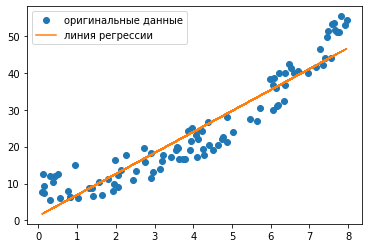

In [72]:
plt.plot(X, y, 'o', label='оригинальные данные')
plt.plot(X, res.intercept + res.slope*X, label='линия регрессии')
plt.legend()
plt.show()

## Обсуждение самопроверки из ОК

Предположим, что `X` и `Y` заданы так: `X = [3, 2, 98, 34, 11, 2, 3]`, `Y = [2, 1, 0, 3, 7, 2, 15]`. Постройте модель линейной регрессии. 

+ Чему будет равно предсказанное значение зависимой переменной, если значение объясняющей равно 0? 
+ На сколько будет увеличиваться предсказанное значение Y при увеличении X на 1? 
+ Чему будет равно значение среднеквадратичной ошибки? 
+ Чему будет равно значение средней абсолютной ошибки? 
+ Верно ли следующее утверждение: значение коэффициента детерминации в данной модели получилось 0.14, значит модель объясняет 76% разброса данных.

In [87]:
X = [3, 2, 98, 34, 11, 2, 3]
Y = [2, 1, 0, 3, 7, 2, 15]

res = scipy.stats.linregress(X, Y)
print(res)

LinregressResult(slope=-0.05549678881752927, intercept=5.498715527011711, rvalue=-0.3775259514373213, pvalue=0.4037712769297898, stderr=0.06087606348645353, intercept_stderr=2.4029802304891703)


In [88]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [89]:
y_pred = res.intercept + res.slope * np.array(X)
mean_squared_error(y_pred, Y)

20.019396621512225

In [90]:
from sklearn.metrics import mean_absolute_error

In [91]:
mean_absolute_error(y_pred, Y)

3.3655782826919967

In [92]:
r_sq = res.rvalue ** 2
print(r_sq)

0.1425258440086547


## Задачка из экзамена

In [95]:
Y  = np.array([12, 40, 8, 60, 61])
Z = np.array([9, 36, 10, 57, 62])
mean_squared_error(Z, Y)

7.8

![](https://github.com/aaparshina/FCI_22-23_data_analysis/blob/main/data/pics/task16.png?raw=true)

## Тест на оценку из ОК

In [96]:
data = pd.read_csv('https://raw.githubusercontent.com/aaparshina/FCI_22-23_data_analysis/main/data/CandyData.csv')
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


1. Выберите переменные `sugarpercent`, `pricepercent` и `winpercent`. Проверьте предпосылку о мультиколлинеарности и укажите верное утверждение.

In [98]:
data[['sugarpercent', 'pricepercent', 'winpercent']].corr()

,sugarpercent,pricepercent,winpercent
sugarpercent,1.000000,0.329706,0.229151
pricepercent,0.329706,1.000000,0.345325
winpercent,0.229151,0.345325,1.000000


Постройте линейную модель, где зависимой переменной выступает `winpercent`, а независимой – `sugarpercent`. 

2. Укажите, верно ли следующее утверждение: на уровне значимости 0.05 процент сахара в конфете статистически значимо влияет на рейтинг конфеты.

3. Чему равно значение оценки коэффициента нашей независимой переменной?

4. Чему будет равно значение оценки коэффициента детерминации в данной модели?

In [99]:
res = scipy.stats.linregress(data['sugarpercent'], data['winpercent'])
print(res)

LinregressResult(slope=11.923863286810729, intercept=44.609441807534644, rvalue=0.22915065712800656, pvalue=0.03489789676169828, stderr=5.559607689077334, intercept_stderr=3.086085992017567)


In [ ]:
# pvalue будет равно 0.03, что меньше уровня значимости 0.05 и 
# указывает на статистически значимое влияние переменной

In [100]:
r_sq = res.rvalue ** 2
print(r_sq)

0.052510023662197224


In [ ]:
# качество модели низкое